In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import os
from sklearn import svm, model_selection, tree, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier
import codecs
from nltk.probability import FreqDist
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import helper
import scipy.special as sp
import random

In [2]:
path='/mnt/A042994142991CDA/Hindi_train/'
svm_scores=[]
random_forest_scores=[]
svm_times=[]
random_forest_times=[]


start=chr(0x900)                    # 0x900 is the unicode point of first character of hindi alphabet
end=chr(0x97F)                      # 0x900 is the unicode point of last character of hindi alphabet


vectorizer=CountVectorizer(token_pattern="["+start+"-"+end+"]+",min_df = 0)


for i in range(3,15):
    iterations=0
    x=int(sp.comb(14,i))
    if(x>20):
        iterations=20
    else:
        iterations=x
    
    x1=0
    x2=0
    y1=0
    y2=0
    for a in range(iterations):
        random_list=random.sample(range(14),i)
        train_data_X,train_data_Y,length=helper.prepare_data(authors_to_consider=random_list,vectorizer=vectorizer,add_features='yes',path=path,no_of_authors=i)

    
        helper.text_normalise(train_data_X,length)  #tf-idf normalisation
        helper.feature_normalise(train_data_X)      #normalisation for machine learning algo

        a,b,c,d=helper.learn(train_data_X,train_data_Y)
        x1+=a
        x2+=b
        y1+=c
        y2+=d
        
    x1=x1/iterations
    x2=x2/iterations
    y1=y1/iterations
    y2=y2/iterations
    
    svm_scores+=[x1]
    svm_times+=[x2]
    random_forest_scores+=[y1]
    random_forest_times+=[y2]
    



['manjeet', 'Rajesh Yadav', 'shekhawat']
['Surendra Mahara', 'Author4', 'shekhawat']
['Rajesh Yadav', 'Author4', 'anu']
['pooja', 'Rajesh Yadav', 'Khushdeep']
['Khushdeep', 'Sameer', 'Gopal Mishra']
['prabhakar', 'kiran sahu', 'Khushdeep']
['Gopal Mishra', 'kiran sahu', 'anu']
['Virat Choudhary', 'kiran sahu', 'Gopal Mishra']
['Rajesh Yadav', 'manjeet', 'Gopal Mishra']
['shekhawat', 'Gopal Mishra', 'Surendra Mahara']
['manjeet', 'anu', 'Gopal Mishra']
['Virat Choudhary', 'Surendra Mahara', 'Rajesh Yadav']
['Sameer', 'Surendra Mahara', 'Author4']
['ravish kumar', 'anu', 'Gopal Mishra']
['Surendra Mahara', 'pooja', 'Khushdeep']
['ravish kumar', 'Surendra Mahara', 'Gopal Mishra']
['kiran sahu', 'Gopal Mishra', 'prabhakar']
['anu', 'Sameer', 'kiran sahu']
['Khushdeep', 'Surendra Mahara', 'ravish kumar']
['manjeet', 'kiran sahu', 'Rajesh Yadav']
['manjeet', 'Virat Choudhary', 'prabhakar', 'Rajesh Yadav']
['kiran sahu', 'manjeet', 'anu', 'shekhawat']
['pooja', 'Gopal Mishra', 'Sameer', 'Vira

['ravish kumar', 'Rajesh Yadav', 'kiran sahu', 'pooja', 'Author4', 'Sameer', 'Surendra Mahara', 'Gopal Mishra']
['kiran sahu', 'Sameer', 'Khushdeep', 'Surendra Mahara', 'Author4', 'prabhakar', 'shekhawat', 'Rajesh Yadav']
['Sameer', 'Surendra Mahara', 'Gopal Mishra', 'Khushdeep', 'anu', 'ravish kumar', 'prabhakar', 'kiran sahu']
['Sameer', 'Surendra Mahara', 'pooja', 'ravish kumar', 'shekhawat', 'prabhakar', 'Gopal Mishra', 'anu']
['prabhakar', 'Rajesh Yadav', 'manjeet', 'ravish kumar', 'Sameer', 'Author4', 'shekhawat', 'anu']
['Virat Choudhary', 'anu', 'kiran sahu', 'Khushdeep', 'prabhakar', 'Author4', 'Sameer', 'pooja']
['ravish kumar', 'anu', 'Rajesh Yadav', 'Gopal Mishra', 'Sameer', 'Surendra Mahara', 'Khushdeep', 'prabhakar']
['Khushdeep', 'Gopal Mishra', 'anu', 'shekhawat', 'prabhakar', 'manjeet', 'Sameer', 'kiran sahu', 'Virat Choudhary']
['Gopal Mishra', 'shekhawat', 'kiran sahu', 'anu', 'ravish kumar', 'pooja', 'prabhakar', 'Surendra Mahara', 'Khushdeep']
['Sameer', 'anu', 'sh

['Rajesh Yadav', 'Author4', 'ravish kumar', 'kiran sahu', 'Gopal Mishra', 'manjeet', 'Virat Choudhary', 'Khushdeep', 'Surendra Mahara', 'prabhakar', 'pooja']
['ravish kumar', 'shekhawat', 'anu', 'pooja', 'Sameer', 'Author4', 'manjeet', 'kiran sahu', 'Rajesh Yadav', 'prabhakar', 'Gopal Mishra']
['Sameer', 'shekhawat', 'prabhakar', 'Surendra Mahara', 'Gopal Mishra', 'manjeet', 'kiran sahu', 'Author4', 'Virat Choudhary', 'pooja', 'Khushdeep']
['Sameer', 'prabhakar', 'Surendra Mahara', 'Rajesh Yadav', 'Gopal Mishra', 'manjeet', 'kiran sahu', 'shekhawat', 'Virat Choudhary', 'pooja', 'Khushdeep']
['Virat Choudhary', 'Surendra Mahara', 'Author4', 'Sameer', 'pooja', 'shekhawat', 'Rajesh Yadav', 'Khushdeep', 'ravish kumar', 'manjeet', 'Gopal Mishra', 'prabhakar']
['Khushdeep', 'Sameer', 'Surendra Mahara', 'prabhakar', 'Rajesh Yadav', 'Virat Choudhary', 'shekhawat', 'kiran sahu', 'Author4', 'Gopal Mishra', 'ravish kumar', 'anu']
['kiran sahu', 'Khushdeep', 'shekhawat', 'anu', 'Rajesh Yadav', 'Su

In [3]:
svm_scores

[0.7928571428571429,
 0.7776785714285714,
 0.7485714285714287,
 0.7351190476190477,
 0.7255102040816327,
 0.6955357142857143,
 0.6984126984126983,
 0.655,
 0.651948051948052,
 0.6297619047619047,
 0.6087127158555729,
 0.5969387755102041]

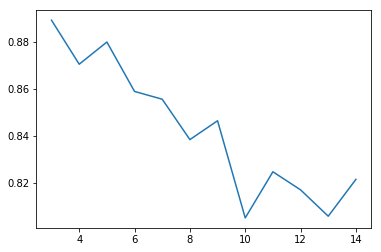

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([x for x in range(3,15)],random_forest_scores)

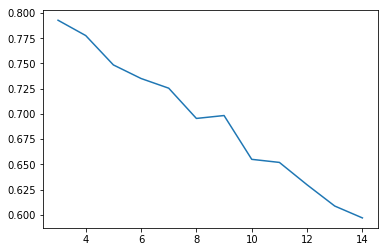

In [7]:
plt.plot([x for x in range(3,15)],svm_scores)